# K-Means Clustering

- Unsupervised Learning
- Tidak ada target atau target tidak memiliki label jelas
- Clustering: Classification tanpa tahu jumlah/nama class target
- Butuh nilai $k$ untuk memperoleh hasil clustering => __elbow method__

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

<hr>

### 1. Manual Calculation

Titik pusat (_centroid_) dari 2 buah titik $A(x_1, y_1)$ dan $B(x_2, y_2)$ adalah $C(x_c, y_c)$ dengan:

$$x_c = \frac {x_1 + x_2} {2}$$

$$y_c = \frac {y_1 + y_2} {2}$$

Formula general mencari _centroid_:

$$\displaystyle x_c = \frac {\sum_{i=1}^{n} x_n} {n}$$

$$\displaystyle y_c = \frac {\sum_{i=1}^{n} y_n} {n}$$

In [5]:
df = pd.DataFrame({
    'x': [0, 1, 2, 2, 1, 0],
    'y': [3, 1, 6, 5, 5, 1]
})
df

,x,y
0,0,3
1,1,1
2,2,6
3,2,5
4,1,5
5,0,1


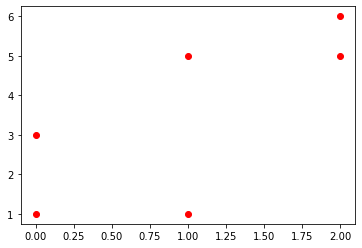

In [6]:
plt.plot(df['x'], df['y'], 'ro')
plt.show()

In [7]:
# centroid
xc = df['x'].sum() / len(df['x'])
yc = df['y'].sum() / len(df['y'])
xc, yc

(1.0, 3.5)

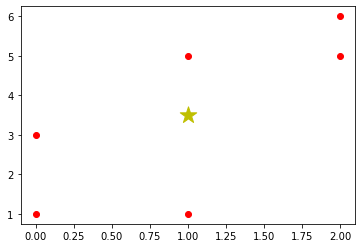

In [10]:
plt.plot(df['x'], df['y'], 'ro')
plt.scatter(xc, yc, s=300, marker='*', color='y')
plt.show()

<hr>

### 2. K-Means

In [12]:
from sklearn.cluster import KMeans

In [13]:
# insert kisi" jumlah klaster
model = KMeans(n_clusters=1)

In [14]:
# clustering tidak butuh target Y, cukup features X
model.fit(df[['x', 'y']])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=1, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [19]:
# centroid
print(model.cluster_centers_)
xc = model.cluster_centers_[:, 0][0]
yc = model.cluster_centers_[:, 1][0]
xc, yc

[[1.  3.5]]


(1.0, 3.5)

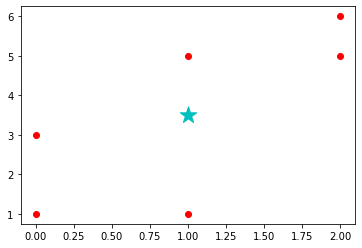

In [20]:
plt.plot(df['x'], df['y'], 'ro')
plt.scatter(xc, yc, s=300, marker='*', color='c')
plt.show()

<hr>

### 3. Contoh Kasus ```load_iris()```

In [21]:
from sklearn.datasets import load_iris

In [22]:
data = load_iris()
dir(data)

['DESCR', 'data', 'feature_names', 'filename', 'target', 'target_names']

In [51]:
dfIris = pd.DataFrame(
    data['data'],
    columns = ['SL', 'SW', 'PL', 'PW']
)
dfIris['target'] = data['target']
dfIris['spesies'] = dfIris['target'].apply(lambda x: data['target_names'][x])
dfIris.head(3)

,SL,SW,PL,PW,target,spesies
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa


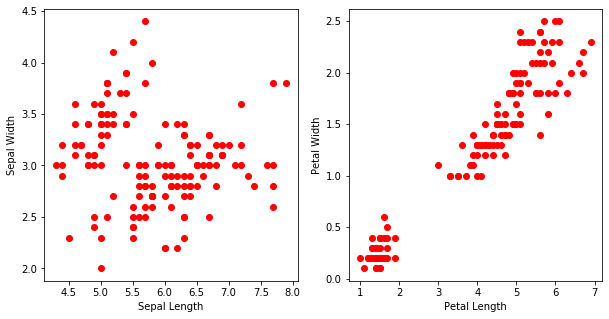

In [27]:
plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.plot(dfIris['SL'], dfIris['SW'], 'ro')
plt.xlabel('Sepal Length'); plt.ylabel('Sepal Width')
plt.subplot(122)
plt.plot(dfIris['PL'], dfIris['PW'], 'ro')
plt.xlabel('Petal Length'); plt.ylabel('Petal Width')
plt.show()

In [29]:
# skenario: kita sudah tahu k = 3 class/cluster
modelIris = KMeans(n_clusters=3)
modelIris.fit(dfIris[['SL', 'SW', 'PL', 'PW']])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [40]:
# centroids
print(modelIris.cluster_centers_)
cSL = modelIris.cluster_centers_[:, 0]
cSW = modelIris.cluster_centers_[:, 1]
cPL = modelIris.cluster_centers_[:, 2]
cPW = modelIris.cluster_centers_[:, 3]

[[5.9016129  2.7483871  4.39354839 1.43387097]
 [5.006      3.428      1.462      0.246     ]
 [6.85       3.07368421 5.74210526 2.07105263]]


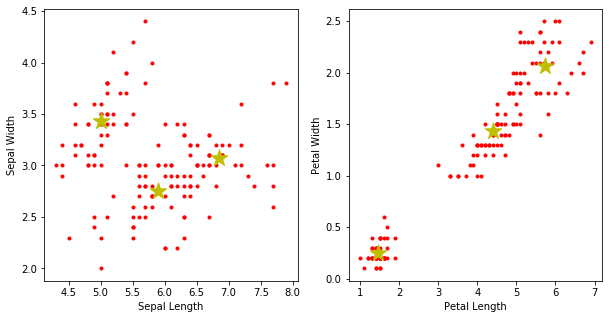

In [44]:
plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.scatter(cSL, cSW, marker='*', s=300, c='y', zorder=99)
plt.plot(dfIris['SL'], dfIris['SW'], 'r.')
plt.xlabel('Sepal Length'); plt.ylabel('Sepal Width')
plt.subplot(122)
plt.scatter(cPL, cPW, marker='*', s=300, c='y', zorder=99)
plt.plot(dfIris['PL'], dfIris['PW'], 'r.')
plt.xlabel('Petal Length'); plt.ylabel('Petal Width')
plt.show()

In [45]:
dfIris['target'].values

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [47]:
# prediksi cluster
modelIris.predict(dfIris[['SL', 'SW', 'PL', 'PW']])

# 0 = versicolor, 1 = setosa, 2 = virginica

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

In [48]:
# model labels = hasil prediksi
modelIris.labels_

# 0 = versicolor, 1 = setosa, 2 = virginica

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [56]:
# insert hasil prediksi

dfIris['pred target'] = modelIris.predict(dfIris[['SL', 'SW', 'PL', 'PW']])
dfIris['pred sp'] = dfIris['pred target'].apply(
    lambda x: 'setosa' if x == 1 else ('virginica' if x == 2 else 'versicolor'))
dfIris.head(3)

,SL,SW,PL,PW,target,spesies,pred target,pred sp
0,5.1,3.5,1.4,0.2,0,setosa,1,setosa
1,4.9,3.0,1.4,0.2,0,setosa,1,setosa
2,4.7,3.2,1.3,0.2,0,setosa,1,setosa


In [58]:
# jumlah data yg prediksinya salah
len(dfIris[dfIris['spesies'] != dfIris['pred sp']])

16

<hr>

### 4. Elbow Method

Bagaimana cara menentukan jumlah cluster ($k$) pada K-Means? 

- Ambil sembarang range $k$, plot $k$ dengan sum squared error (nilai inertia)
- Terbentuk elbow plot, nilai $k$ terbaik ada di bagian siku plot

In [59]:
# ambil range k, misal 1-10
k_range = np.arange(1, 11)
k_range

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [65]:
# Nilai SSE / inertia untuk setiap k
inertia = []
for k in k_range:
    model = KMeans(n_clusters=k)
    model.fit(dfIris[['SL', 'SW', 'PL', 'PW']])
    inertia.append(model.inertia_)
inertia

[681.3706,
 152.34795176035792,
 78.85144142614601,
 57.228473214285714,
 46.44618205128205,
 39.03998724608725,
 34.40900974025974,
 30.06459307359308,
 27.936161312371844,
 26.619057550292847]

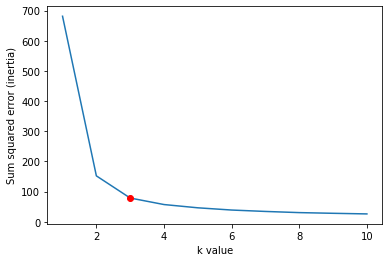

In [63]:
# plot k vs sse / inertia
plt.plot(k_range, inertia)
plt.plot(k_range[2], inertia[2], 'ro')
plt.xlabel('k value')
plt.ylabel('Sum squared error (inertia)')
plt.show()